<a href="https://colab.research.google.com/github/Tharunopi/PyTorch/blob/main/PyTorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A PyTorch workflow
1.  Turn data into tensor
2.  Build or pick a pretrained model


```
2.1. Pick a loss function and optimizer
2.2. Build a training loop
```


3.   Fit the model to the data and make prediction
4.  Evalvate the model
5.   Improve through experimentation
6.Save and reload your trained model






In [295]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

In [296]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.device(device)

device(type='cuda')

# **Creating dataset by using linear regression formula**

In [297]:
start, end, steps = 0, 1, 0.02
X = torch.arange(start, end, steps).unsqueeze(dim=1)
X[:5]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800]])

In [298]:
weight = 0.7
bias = 0.3
y = weight * X + bias
y[:5]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560]])

# **Splitting the data**

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [301]:
print(len(X_train), len(y_test))

40 10


# **Visualizing the data**

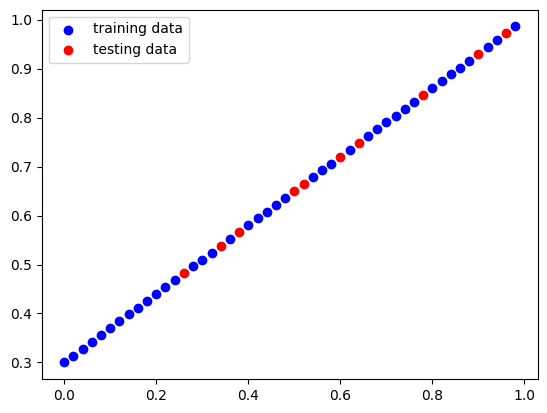

In [302]:
def visualize(train_x=X_train, test_x=X_test, train_y=y_train, test_y=y_test, prediction=None):
  plt.scatter(train_x, train_y, c='b', label='training data')
  plt.scatter(test_x, test_y, c='r', label='testing data')
  if prediction is not None:
    plt.scatter(test_x, prediction, c='g', label='prediction data')
  plt.legend()
  plt.show()

visualize()

# **Building PyTorch model**

In [303]:
#creating a linear regression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # creating a forward method for computation
  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.weights * x + self.bias

In [304]:
#checking contents of our model
# torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.4836], requires_grad=True),
 Parameter containing:
 tensor([-0.5093], requires_grad=True)]

In [305]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4836])), ('bias', tensor([-0.5093]))])

In [306]:
with torch.inference_mode():
  y_pred = model_0(X_test)

print(y_pred)

tensor([[-0.3836],
        [-0.1321],
        [-0.2192],
        [-0.0741],
        [-0.3449],
        [-0.0451],
        [-0.2579],
        [-0.2675],
        [-0.1998],
        [-0.3256]])


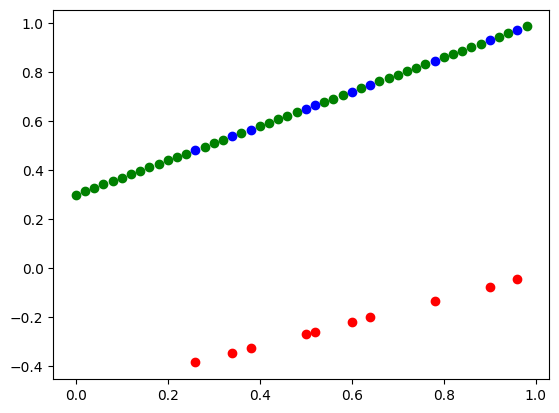

In [307]:
plt.scatter(X_train, y_train, c='g')
plt.scatter(X_test, y_test, c='b')
plt.scatter(X_test, y_pred, c='r')
plt.show()

In [308]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.01)

# **Training loop**

0. Loop through the data
1. Forward pass to make predictions on data
2. Backward pass to move backwards to model to calculate gradients of the model to calculate loss.
3. use Optimizers to adjust the model parameters to reduce the loss.

In [309]:
# 0. Loop through throught the data
epochs = 300

epoch_count, train_loss_value, test_loss_value = [], [], []

for i in range(epochs):

  model_0.train() #turns on gradient tracking

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad() # sets the gradient to none

  loss.backward()

  optimizer.step() # over time the gradients may accumulate so we have to set them to None

  # print("_______________________________________________________________________")

  # print(f'predicted weight :{model_0.state_dict()["weights"][0]} actual: {weight}')
  # print(f'predicted bias :{model_0.state_dict()["bias"][0]} actual: {bias}')

  model_0.eval() #turns off gradient tracking
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if i % 10 == 0:
    epoch_count.append(i)
    train_loss_value.append(loss)
    test_loss_value.append(test_loss)
    print(f'Epoch: {i} | loss: {loss} | test_loss: {test_loss}')

Epoch: 0 | loss: 0.9100828170776367 | test_loss: 0.9238549470901489
Epoch: 10 | loss: 0.7884140610694885 | test_loss: 0.79648357629776
Epoch: 20 | loss: 0.6667450666427612 | test_loss: 0.6691122055053711
Epoch: 30 | loss: 0.5450760126113892 | test_loss: 0.541740894317627
Epoch: 40 | loss: 0.4234069883823395 | test_loss: 0.4143694341182709
Epoch: 50 | loss: 0.301737904548645 | test_loss: 0.2869980037212372
Epoch: 60 | loss: 0.18006891012191772 | test_loss: 0.15962658822536469
Epoch: 70 | loss: 0.058399833738803864 | test_loss: 0.03496255725622177
Epoch: 80 | loss: 0.03050965443253517 | test_loss: 0.020727798342704773
Epoch: 90 | loss: 0.024783408269286156 | test_loss: 0.016999781131744385
Epoch: 100 | loss: 0.019205819815397263 | test_loss: 0.013068717904388905
Epoch: 110 | loss: 0.013620644807815552 | test_loss: 0.009137654677033424
Epoch: 120 | loss: 0.008043399080634117 | test_loss: 0.00525736203417182
Epoch: 130 | loss: 0.002458223607391119 | test_loss: 0.0013263046275824308
Epoch: 

In [310]:
train_loss_value = [i.detach().cpu().numpy() for i in train_loss_value]
test_loss_value = [i.detach().cpu().numpy() for i in test_loss_value]

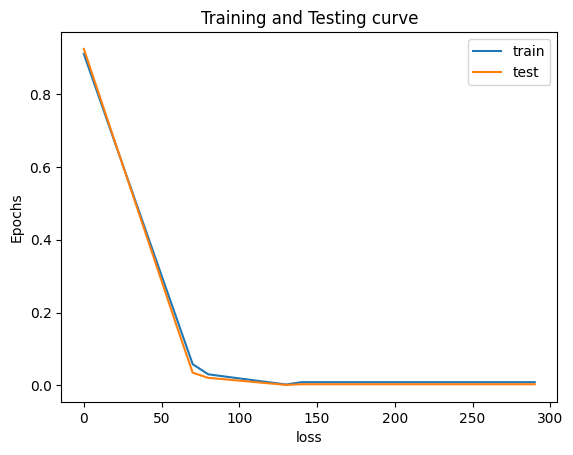

In [315]:
plt.plot(epoch_count, train_loss_value, label="train")
plt.plot(epoch_count, test_loss_value, label="test")
plt.xlabel("loss")
plt.ylabel("Epochs")
plt.title("Training and Testing curve")
plt.legend()

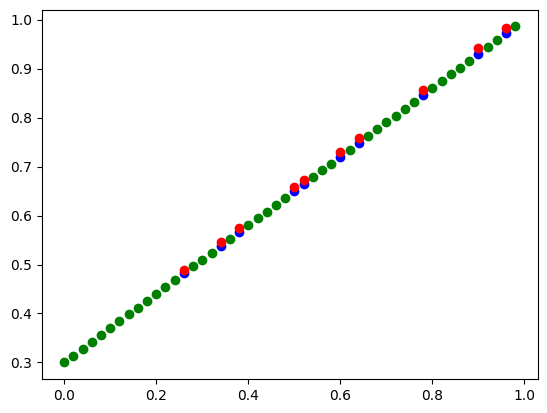

In [316]:
with torch.inference_mode():
  y_pred = model_0(X_test)
  plt.scatter(X_train, y_train, c='g')
  plt.scatter(X_test, y_test, c='b')
  plt.scatter(X_test, y_pred, c='r')
  plt.show()

In [313]:
20 % 10

0